# Task 1 – The synthetic dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("synthetic_dataset.csv")
train_data

,x1,x2,y
0,3.989474,6.935317,1
1,-6.248354,-8.750153,-1
2,-1.419806,-3.427461,-1
3,-9.266949,7.083503,1
4,-8.487555,-4.916374,-1
5,9.646598,4.529411,1
6,-3.389042,1.889777,-1
7,-3.778773,4.807690,-1
8,-9.399948,0.257452,1
9,-8.592216,6.509648,1


In [3]:
validation_data = pd.read_csv("synthetic_test_dataset.csv")
validation_data

,x1,x2,y
0,-1.800591,2.131077,-1.0
1,-5.116260,6.153548,-1.0
2,1.040485,0.889453,-1.0
3,1.796096,-1.008297,-1.0
4,-4.039528,7.832167,-1.0
...,...,...,...
495,3.395839,-9.239054,1.0
496,-1.880274,9.524184,-1.0
497,-5.079985,-7.185805,-1.0
498,-4.438022,-7.137607,-1.0


In [4]:
train_X = train_data[["x1", "x2"]]
train_y = train_data["y"]
test_X = validation_data[["x1", "x2"]]
test_y = validation_data["y"]

## Step 1

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
training_errors = []
validation_errors = []

linear_regression = LinearRegression()
linear_regression.fit(train_X, train_y)

train_y_predict = linear_regression.predict(train_X)
train_error = mean_squared_error(train_y, train_y_predict)

test_y_predict = linear_regression.predict(test_X)
test_error = mean_squared_error(test_y, test_y_predict)

training_errors.append(train_error)
validation_errors.append(test_error)

print("Training Error: ", train_error)
print("Validation Error: ", test_error)

Training Error:  0.8669392995099426
Validation Error:  0.844018025552504


## Step 2

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
orders = [2, 3, 4]
for order in orders:
    polynomial = PolynomialFeatures(degree = order)
    train_X_in_poly = polynomial.fit_transform(train_X)
    test_X_in_poly = polynomial.transform(test_X)
    
    polynomial_linear_regression = LinearRegression()
    polynomial_linear_regression.fit(train_X_in_poly, train_y)
    
    poly_y_predict = polynomial_linear_regression.predict(train_X_in_poly)
    poly_train_error = mean_squared_error(train_y, poly_y_predict)
    training_errors.append(poly_train_error)
    
    poly_test_predict = polynomial_linear_regression.predict(test_X_in_poly)
    poly_test_error = mean_squared_error(test_y, poly_test_predict)
    validation_errors.append(poly_test_error)
    
    print("Train Error in", order, "degree =", poly_train_error)
    print("Validation Error in", order, "degree =", poly_test_error)
    print()

Train Error in 2 degree = 0.6712559029286339
Validation Error in 2 degree = 0.752793662214335

Train Error in 3 degree = 0.25362367018863907
Validation Error in 3 degree = 0.6867549907072102

Train Error in 4 degree = 0.1737045044469892
Validation Error in 4 degree = 0.5697646871091908



## Step 3

In [9]:
import matplotlib.pyplot as plt

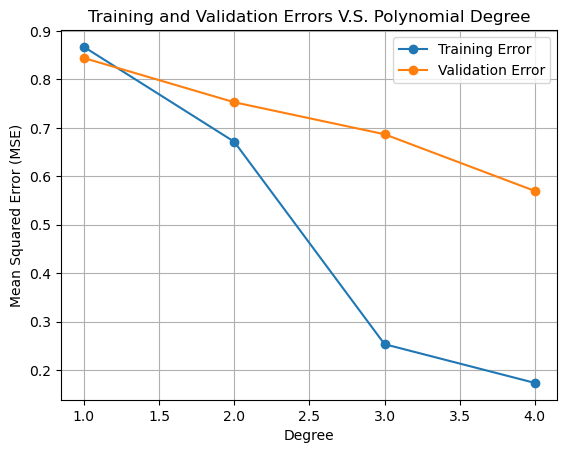

In [10]:
orders = [1, 2, 3, 4]
plt.plot(orders, training_errors, label='Training Error', marker='o')
plt.plot(orders, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Errors V.S. Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Step 4

Pattern observed: The higher the degree of polynomial, the lower the training errors and validation errors. Also,the there is a large gap between training errors and validation error, so there must be some overfitting in this model. The reason of the overfitting is probably caused by the training data is too small.

Model Selection: I will select the 3rd degree polynomial linear regression as the model. The main reason that I will choose 4th degree polynomial is it has the best result. It is true that there is a large overfitting in this result. The linear regression (1st degree) has a very high MSE, which means the model does not capture the data very well. Although 2nd degree polynomial model has only a little bit of overfitting, the MSE is still relatively high, so I consider to not choosing this one. For 3rd degree and 4th degree, they are having similar type of result, a large overfitting, but the result performs better than the first two degree. Overfitting may caused by the model also capture many noises, and I believe some noises can remove by preprocessing, and it may lead to less overfitting. Comparing the result between 3rd degree and 4th degree. 4th degree has a better performance, so I would like to pick the 4th degree as the model.

# Task 2

In [11]:
bc_data = pd.read_csv("breast_cancer_dataset_preprocessed.csv")
bc_data.info

<bound method DataFrame.info of            x1        x2        x3        x4        x5        x6        x7  \
0    4.147954 -4.443183 -0.068966  4.035033  0.817574 -0.476277  0.553593   
1   -4.595154 -2.684882  1.084110 -0.403925  0.410287  0.687051  0.284184   
2   -0.755349 -2.318373 -1.938275  0.279953  0.241712  3.409801  0.092694   
3   -0.453863  0.197572 -1.037060  0.344384  0.070598 -0.822546 -0.993352   
4   -3.278680 -0.792025 -0.736833 -1.621295 -0.085459 -0.824324 -0.107042   
..        ...       ...       ...       ...       ...       ...       ...   
376 -1.597664 -1.506666  0.367973  1.141389  0.238218  0.440264  0.164339   
377 -1.788783  2.454235  2.152188 -0.332167 -3.583985  0.470745  0.700910   
378  0.727709  3.375979  0.590259 -0.057728 -1.426169 -2.557794 -0.689335   
379  3.247515 -2.973291  2.835173 -2.731819  0.634095  0.435304 -0.863943   
380 -1.113205  4.050544 -0.325404 -0.948458 -1.543403 -2.100260  0.650702   

           x8  y  
0    1.268819  M  
1    

In [12]:
X = bc_data[["x1", "x2", "x3", "x4", "x5", "x6" ,"x7", "x8"]]
X

,x1,x2,x3,x4,x5,x6,x7,x8
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755
...,...,...,...,...,...,...,...,...
376,-1.597664,-1.506666,0.367973,1.141389,0.238218,0.440264,0.164339,-0.114349
377,-1.788783,2.454235,2.152188,-0.332167,-3.583985,0.470745,0.700910,-0.443688
378,0.727709,3.375979,0.590259,-0.057728,-1.426169,-2.557794,-0.689335,0.028662
379,3.247515,-2.973291,2.835173,-2.731819,0.634095,0.435304,-0.863943,0.822048


In [13]:
y = bc_data["y"].map({"M": 1, "B": 0})
y.value_counts()

0    239
1    142
Name: y, dtype: int64

In [14]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [15]:
# SJSU ID: 015805426
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=426)
train_scores = []
test_scores = []
model_name=[]

In [16]:
# first model: Logistic Regression
bc_logistic_regression = LogisticRegression()
bc_logistic_regression.fit(train_X, train_y)

train_predict_y = bc_logistic_regression.predict(train_X)
test_predict_y = bc_logistic_regression.predict(test_X)

lr_train_score = f1_score(train_y, train_predict_y, average='binary')
lr_test_score = f1_score(test_y, test_predict_y, average='binary')

print("Logistic Regression Training F1 score:", lr_train_score)
print("Logistic Regression Validation F1 score:", lr_test_score)

train_scores.append(lr_train_score)
test_scores.append(lr_test_score)
model_name.append("Logistic Regression")

Logistic Regression Training F1 score: 0.9816513761467891
Logistic Regression Validation F1 score: 0.96875


In [17]:
# second model: Decision Tree
from sklearn.tree import DecisionTreeClassifier

bc_decision_tree = DecisionTreeClassifier()
bc_decision_tree.fit(train_X, train_y)

train_predict_y = bc_decision_tree.predict(train_X)
test_predict_y = bc_decision_tree.predict(test_X)

dt_train_score = f1_score(train_y, train_predict_y, average='binary')
dt_test_score = f1_score(test_y, test_predict_y, average='binary')

print("Decision Tree Training F1 score:", dt_train_score)
print("Decision Tree Validation F1 score:", dt_test_score)

train_scores.append(dt_train_score)
test_scores.append(dt_test_score)
model_name.append("Decision Tree")

Decision Tree Training F1 score: 1.0
Decision Tree Validation F1 score: 0.8787878787878788


In [18]:
# third model: SVM
from sklearn.svm import SVC

C = [0.01, 0.1, 1, 10,100]
kernels = ['linear', 'poly', 'rbf']

best_test = 0
best_train = 0
best_model = ""

for c in C:
    for kernel in kernels:
        bc_svc = SVC(kernel=kernel, C=c)
        bc_svc.fit(train_X, train_y)
        
        train_predict_y = bc_svc.predict(train_X)
        test_predict_y = bc_svc.predict(test_X)
        
        svc_train_score = f1_score(train_y, train_predict_y, average='binary')
        svc_test_score = f1_score(test_y, test_predict_y, average='binary')
        
        if svc_test_score > best_test:
            best_test = svc_test_score
            best_train = svc_train_score
            best_model = f"SVC C={c}, kernel={kernel}"

print(best_model, "training:", best_train)
print(best_model, "testing:", best_test)

train_scores.append(best_train)
test_scores.append(best_test)
model_name.append(best_model)

SVC C=0.01, kernel=linear training: 0.9428571428571428
SVC C=0.01, kernel=linear testing: 0.9841269841269841


In [19]:
# fourth model: MLP
from sklearn.neural_network import MLPClassifier

activations = ["identity", "logistic", "tanh", "relu"]
solvers = ["sgd", "adam", "lbfgs"]
best_test = 0
best_train = 0
best_model = ""

for activation in activations:
    for solver in solvers:
        bc_mlp = MLPClassifier(activation=activation, solver=solver, max_iter=1000, random_state=426)
        bc_mlp.fit(train_X, train_y)

        train_predict_y = bc_mlp.predict(train_X)
        test_predict_y = bc_mlp.predict(test_X)

        mlp_train_score = f1_score(train_y, train_predict_y, average='binary')
        mlp_test_score = f1_score(test_y, test_predict_y, average='binary')
        
        if mlp_test_score > best_test:
            best_test = mlp_test_score
            best_train = mlp_train_score
            best_model = f"MLP activation={activation}, solver={solver}"


print(best_model, "training:", best_train)
print(best_model, "testing:", best_test)

train_scores.append(best_train)
test_scores.append(best_test)
model_name.append(best_model)

MLP activation=relu, solver=sgd training: 0.9769585253456221
MLP activation=relu, solver=sgd testing: 0.9841269841269841


In [20]:
# fifth model: Random Forest
from sklearn.ensemble import RandomForestClassifier

bc_rf = RandomForestClassifier(n_estimators=100, random_state=42)
bc_rf.fit(train_X, train_y)

train_predict_y = bc_rf.predict(train_X)
test_predict_y = bc_rf.predict(test_X)

rf_train_score = f1_score(train_y, train_predict_y, average='binary')
rf_test_score = f1_score(test_y, test_predict_y, average='binary')

print("Random Forest Training F1 score:", rf_train_score)
print("Random Forest Validation F1 score:", rf_test_score)

train_scores.append(rf_train_score)
test_scores.append(rf_test_score)
model_name.append("Random Forest")

Random Forest Training F1 score: 1.0
Random Forest Validation F1 score: 0.9523809523809523


In [21]:
import sys
# (failed to run, the kernel is dead in jupyter notebook if run this)
# !{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install xgboost

In [22]:
# sixth model: Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

bc_gb = GradientBoostingClassifier()
bc_gb.fit(train_X, train_y)

train_predict_y = bc_gb.predict(train_X)
test_predict_y = bc_gb.predict(test_X)

gb_train_score = f1_score(train_y, train_predict_y, average='binary')
gb_test_score = f1_score(test_y, test_predict_y, average='binary')

print("Gradient Boosting Training F1 score:", gb_train_score)
print("Gradient Boosting Validation F1 score:", gb_test_score)

train_scores.append(gb_train_score)
test_scores.append(gb_test_score)
model_name.append("Gradient Boosting")

Gradient Boosting Training F1 score: 1.0
Gradient Boosting Validation F1 score: 0.9206349206349206


In [23]:
# seventh model: xgboost (Extreme Gradient Boosting)
import xgboost as xg
# booster = "dart" provide similar validation score as gbtree, but the runtime is 10 times slower
bc_xgb = xg.XGBClassifier(objective ='binary:logistic', n_estimators=1000, seed = 426, booster="gbtree")
bc_xgb.fit(train_X, train_y)

train_predict_y = bc_xgb.predict(train_X)
test_predict_y = bc_xgb.predict(test_X)

xgb_train_score = f1_score(train_y, train_predict_y, average='binary')
xgb_test_score = f1_score(test_y, test_predict_y, average='binary')

print("XGBoost Training F1 score:", xgb_train_score)
print("XGBoost Validation F1 score:", xgb_test_score)

train_scores.append(xgb_train_score)
test_scores.append(xgb_test_score)
model_name.append("Extreme Gradient Boosting")

XGBoost Training F1 score: 1.0
XGBoost Validation F1 score: 0.9538461538461539


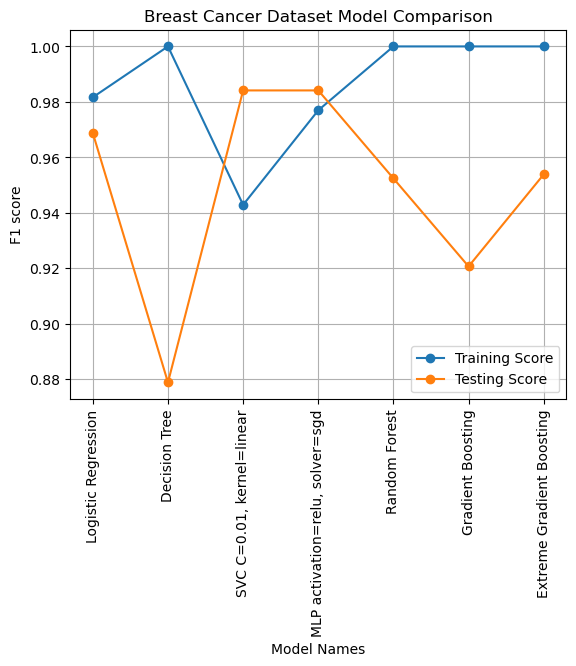

In [24]:
plt.plot(model_name, train_scores, label='Training Score', marker='o')
plt.plot(model_name, test_scores, label='Testing Score', marker='o')
plt.xlabel('Model Names')
plt.ylabel('F1 score')
plt.title('Breast Cancer Dataset Model Comparison')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

## Description in Docs File that are submitted